In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
train = pd.read_csv("../Data/train.csv")
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


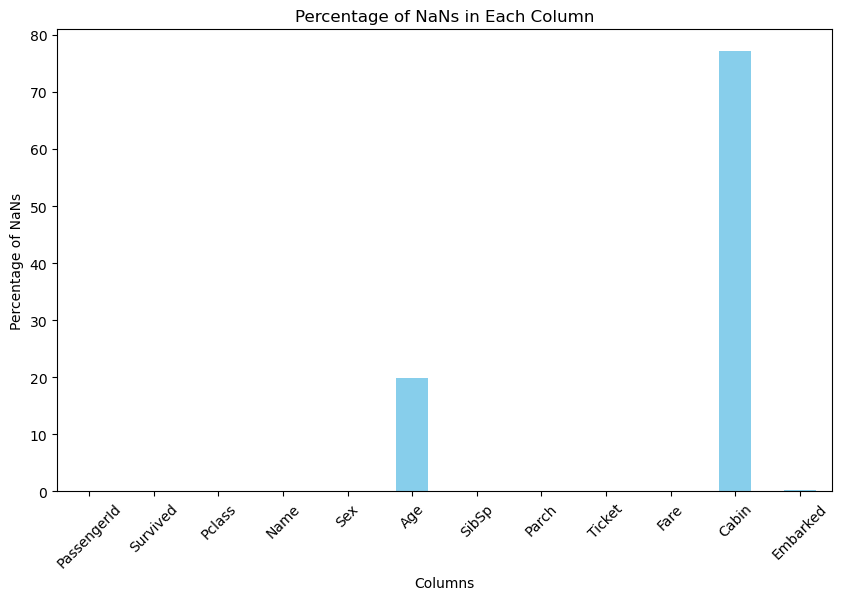

In [17]:
# Calculate the percentage of NaNs in each column
nan_percentage = (train.isna().sum() / len(train)) * 100

# Create a bar plot
plt.figure(figsize=(10, 6))
nan_percentage.plot(kind='bar', color='skyblue')
plt.title('Percentage of NaNs in Each Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of NaNs')
plt.xticks(rotation=45)
plt.show()

In [18]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [19]:
train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [20]:
train = pd.get_dummies(train, columns=['Embarked'])
train['is_male'] = pd.get_dummies(train['Sex'])['male']
train = train.drop(columns='Sex')
train

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,is_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,False,False,True,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,True,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,False,False,True,False
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,False,False,True,True
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,False,False,True,False
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,False,False,True,False
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,True,False,False,True


<Axes: >

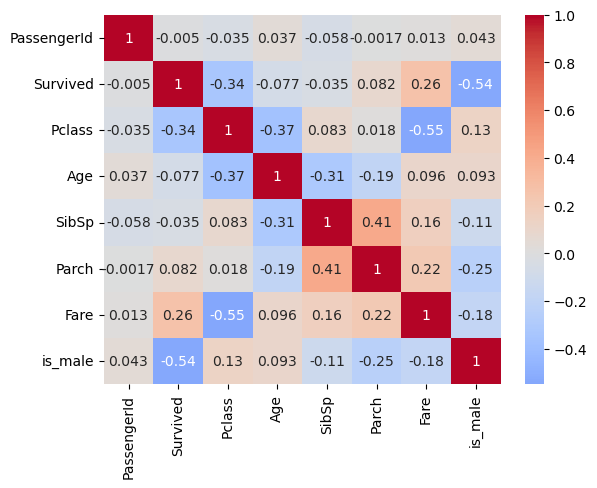

In [9]:
correlation_matrix = train.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)


In [17]:
from itertools import product
characters = ['B', 'E']
string_lenght = 5
combinations = product(characters, repeat=string_lenght)
result_strings = [''.join(combination) for combination in combinations]
result_strings

['BBBBB',
 'BBBBE',
 'BBBEB',
 'BBBEE',
 'BBEBB',
 'BBEBE',
 'BBEEB',
 'BBEEE',
 'BEBBB',
 'BEBBE',
 'BEBEB',
 'BEBEE',
 'BEEBB',
 'BEEBE',
 'BEEEB',
 'BEEEE',
 'EBBBB',
 'EBBBE',
 'EBBEB',
 'EBBEE',
 'EBEBB',
 'EBEBE',
 'EBEEB',
 'EBEEE',
 'EEBBB',
 'EEBBE',
 'EEBEB',
 'EEBEE',
 'EEEBB',
 'EEEBE',
 'EEEEB',
 'EEEEE']